# **Investigate Hotel Business using Data Visualization**

In [ ]:
Faiz Naida Salimah <br>

## **Load Dataset**
---

In [1]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read dataset
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
#overview
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73416,City Hotel,1,12,2019,October,34,21,1,2,2,...,0,No Deposit,14.0,NaN,0,Personal,144.0,0,0,Canceled
36504,Resort Hotel,0,147,2019,July,20,16,2,5,2,...,0,No Deposit,436.0,NaN,0,Personal,70.4,0,0,Check-Out
78329,City Hotel,0,0,2018,February,51,13,0,1,1,...,0,No Deposit,NaN,40.0,0,Personal,67.0,0,0,Check-Out
83712,City Hotel,0,59,2018,April,6,6,2,2,2,...,0,No Deposit,1.0,NaN,0,Family,62.0,0,0,Check-Out
74678,City Hotel,1,365,2017,December,42,17,1,1,2,...,0,Non Refund,1.0,NaN,0,Personal,62.8,0,0,Canceled


## **Data Exploration**
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# cek data duplicat
df.duplicated().sum()

33261

- Dataset memeiliki **119390** records dan **29** fitur
- Terdapat **missing/null value** pada fitur **`company`**, **`city`**, **`children`**, **`agent`**
- Tipe data : **object, float64, int64**
- Terdapat **33261 data duplikat**

In [6]:
# cek valaue dari setiap fitur
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('')

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']

is_canceled have 2 unique values: int64
is_canceled values: [0 1]

lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 

- Terdapat value **'Undefined'** pada fitur `meal`, `market_segment`, `distribution_channel`. Akan dilakukan analisis lebih lanjut apakah valaue tersebut perlu di handling atau tidak
- Fitur **`company`** dan **`agent`** memiliki value float, kemungkinan merujuk pada id atau **value yang telah di encoding**
- Fitur yang menunjukkan jumlah tamu yaitu `adults`, `children`, dan `babies` akan dilakukan analisis lebih lanjut untuk mengatahui apakah terdapat data yang anomali

In [7]:
# statistical summary fitur numerik
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


- Fitur `adr`, **Averange Daily Rate** (room revenue/number of room sold) terdapat **value negatif**. Hal itu merupakan **anomali** dan perlu didrop.

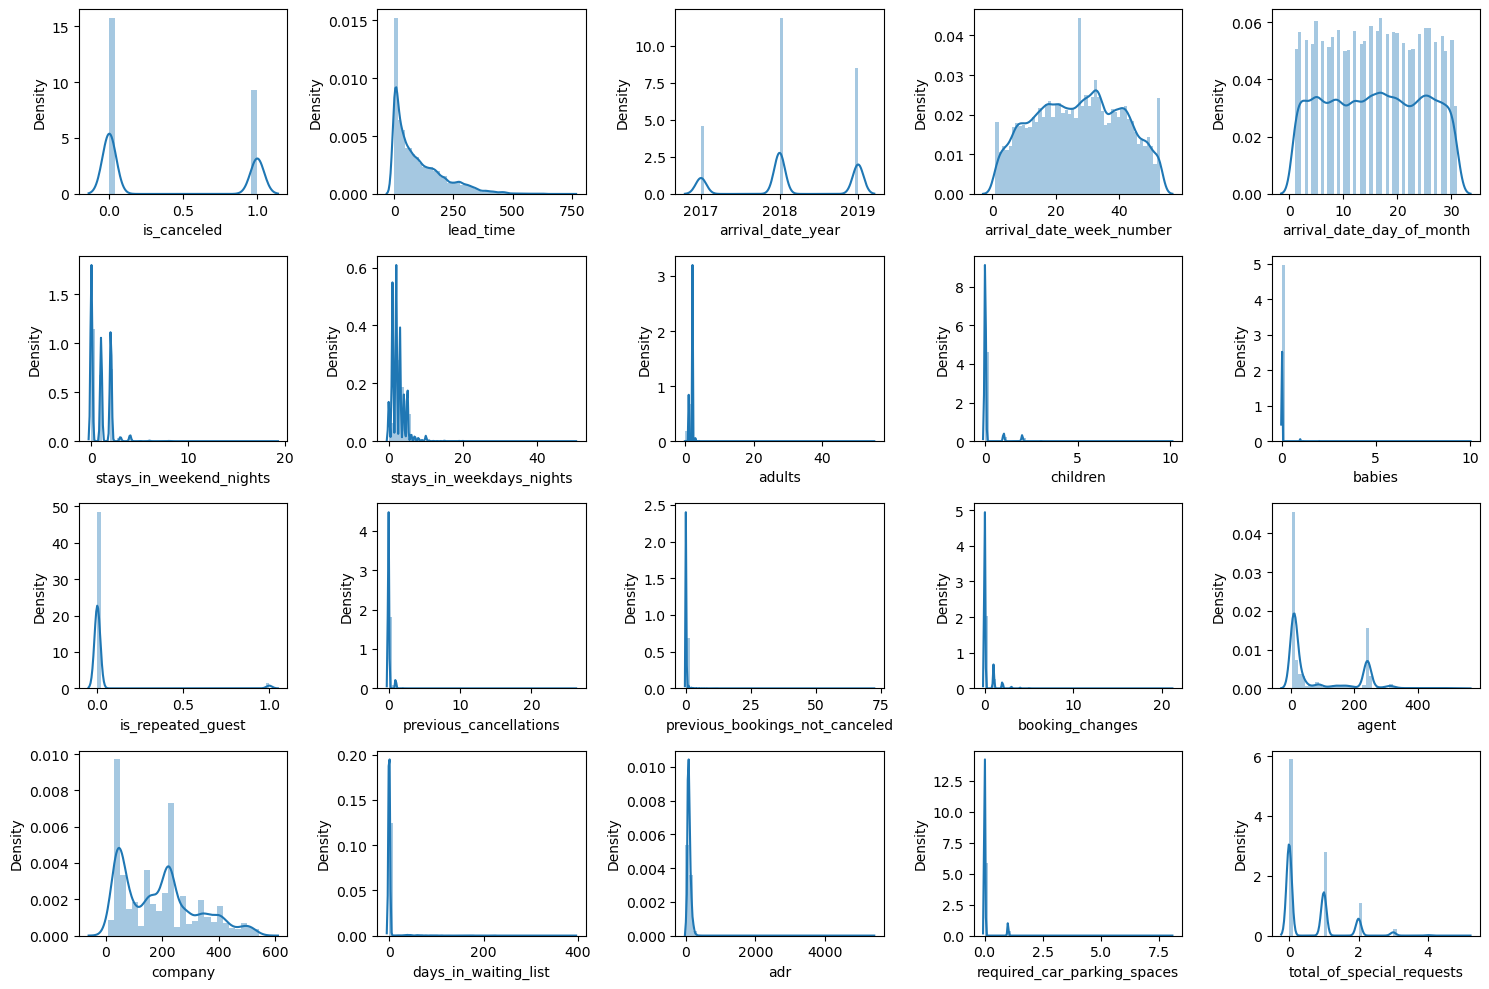

In [8]:
# cek distribusi fitur numerikal
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

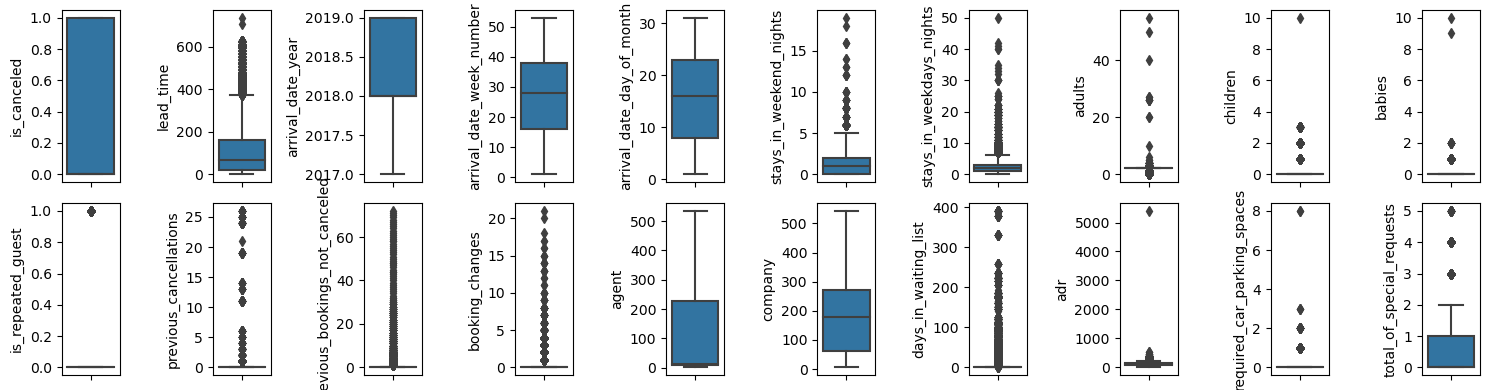

In [9]:
# cek outlier fitur numerikal
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

- Apakah value maksimal dari fitur childern, babies, dan adr merupakan anomali?
- Apakah dalam 1 kali reservasi tamu dewasa membawa 8-10 bayi atau anak-anak?
- Pada fitur adr terdapat perbedaan value yang sangat jauh.

In [10]:
# cek kolom adr
df[df['adr'] > 5000].T

,48515
hotel,City Hotel
is_canceled,1
lead_time,35
arrival_date_year,2018
arrival_date_month,May
arrival_date_week_number,13
arrival_date_day_of_month,25
stays_in_weekend_nights,0
stays_in_weekdays_nights,1
adults,2


In [11]:
# cek children > 10
df[df['children'] >= 9].T

,328
hotel,Resort Hotel
is_canceled,1
lead_time,55
arrival_date_year,2017
arrival_date_month,September
arrival_date_week_number,29
arrival_date_day_of_month,12
stays_in_weekend_nights,4
stays_in_weekdays_nights,10
adults,2


In [12]:
# cek children >= 9
df[df['babies'] >= 9].T

,46619,78656
hotel,City Hotel,City Hotel
is_canceled,0,0
lead_time,37,11
arrival_date_year,2018,2017
arrival_date_month,March,December
arrival_date_week_number,3,42
arrival_date_day_of_month,12,11
stays_in_weekend_nights,0,2
stays_in_weekdays_nights,2,1
adults,2,1


In [13]:
# cek tamu
# tidak ada tamu
guest_0 = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0) & (df['reservation_status'] != 'Canceled')]
guest_0.shape[0]

156

In [14]:
# tidak tamu adult namun ada children atau babies
guest_0_adults = df[(df['adults'] == 0) & ((df['children'] != 0) | (df['babies'] != 0)) & (df['reservation_status'] != 'Canceled')]
guest_0_adults.shape[0]

142

In [15]:
# cek night
night_0 = df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_weekdays_nights'] == 0) & (df['reservation_status'] != 'Canceled')]
night_0.shape[0]

693

Ditemukan beberapa data anomali dan perlu di drop:
- Data **`adr` > 5000**
- Data `children` >=10 dan `babies` >= 8
- 156 data yang **tidak memiliki tamu** sama seali
- 142 data yang **hanya memiliki tamu anak-anak atau bayi, tidak ada orang dewasa**. Hal tersebut kurang relate.
- 693 data yang memiliki value **night stay = 0**

In [16]:
# statistical summary fitur ketegorikal
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


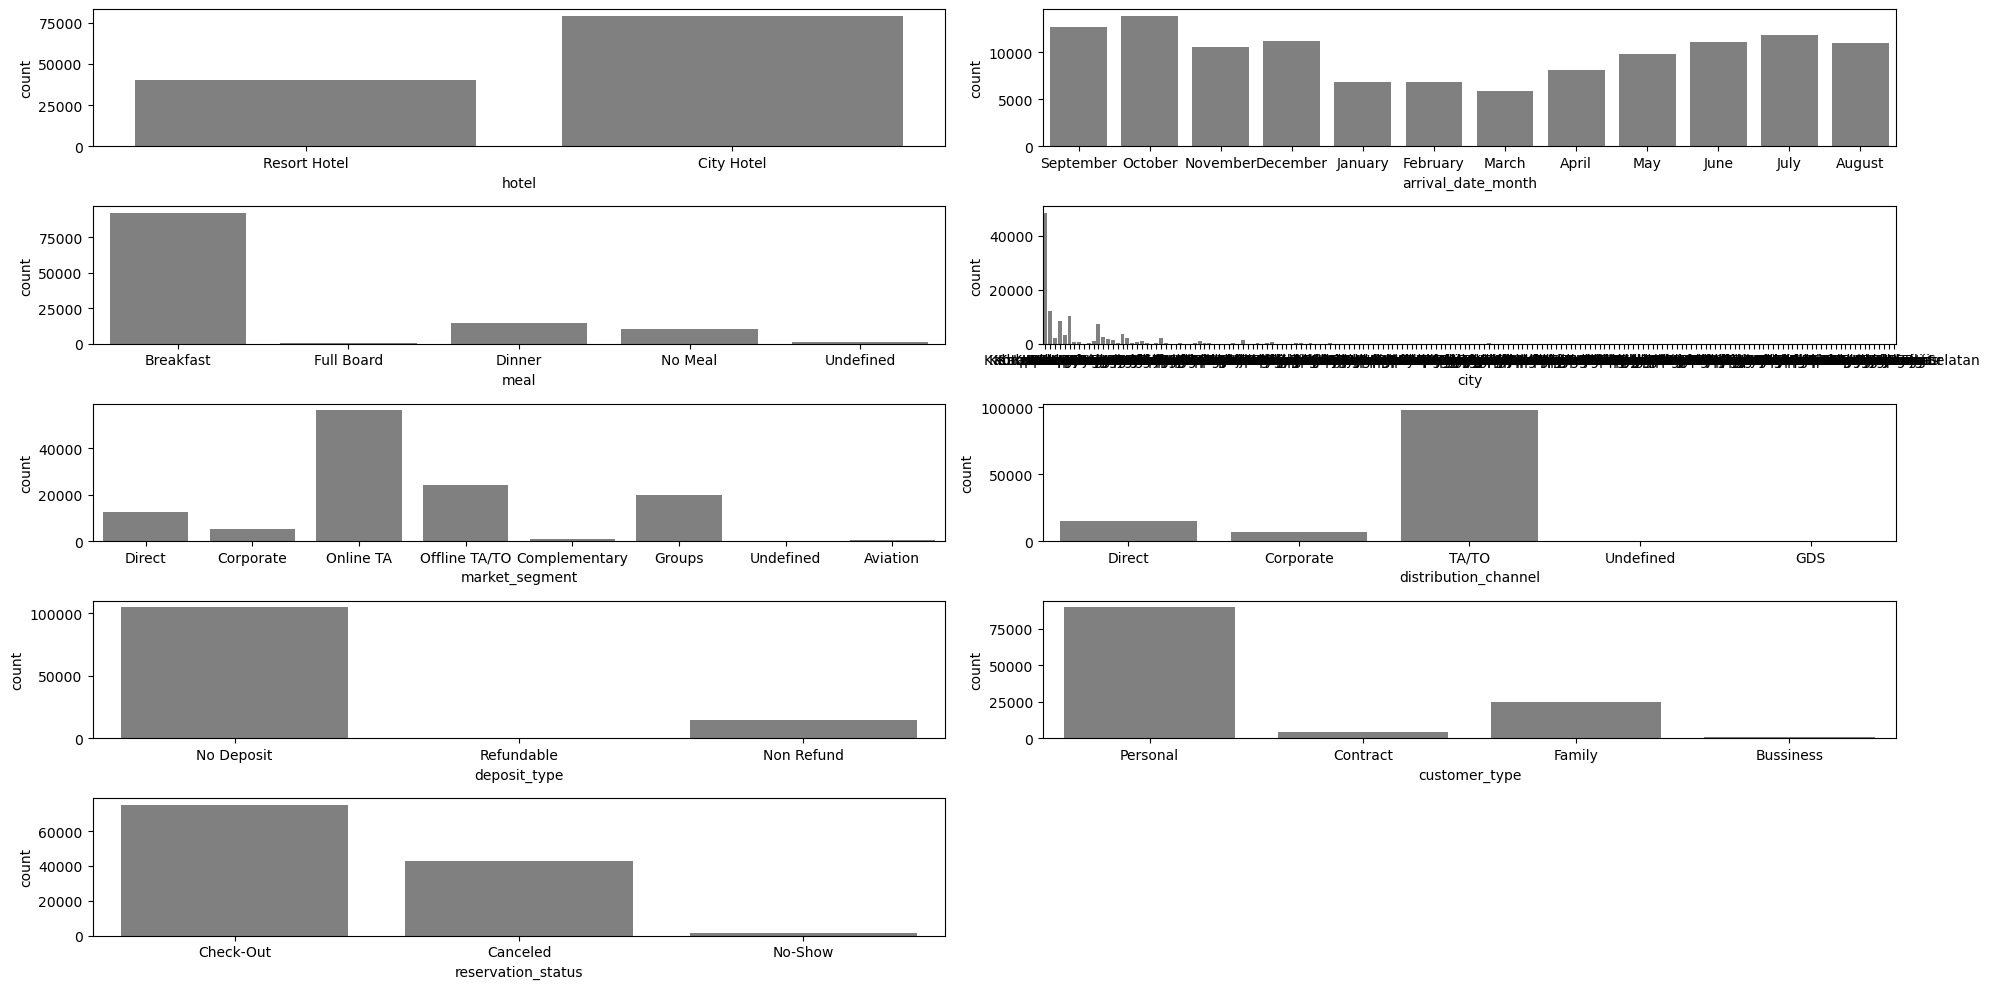

In [17]:
# cek distribusi fitur kategorikal
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='grey')
    plt.tight_layout()

## **Data Cleansing**
---

### Handling Duplicated Data

In [18]:
# copy dataset untuk back up
df_clean = df.copy()

In [19]:
# drop data duplikat
df_clean.drop_duplicates(inplace=True)

In [20]:
# cek data setelah drop duplikat
df_clean.duplicated().sum()

0

### Handling Null Values

Fitur yang terdapat null values **company, city, children, agent** <br>
Treatment :
- company - null value diisi dengan 0, mengindikasikan tamu tidak bersal dari company
- agent - null value diisi dengan 0, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
- children - null value diisi dengan 0, mengindikasikan tamu tidak membawa anak-anak
- city - null values diisi dengan 'Undefined', karena kota tidak diketahui secara pasti.

In [21]:
# company, agent, children
fitur = ['company', 'children', 'agent']

for col in fitur:
    df_clean[col].fillna(0, inplace=True)

In [22]:
# city
df_clean['city'].fillna('Undefined', inplace=True)

In [23]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Value Issues

Fitur **`meal`** dapat dikategorikan menjadi 2 yaitu 'With Meal' dan 'No Meal'
- **'With Meal'** = Breakfast, Full Board, Dinner
- **'No Meal'** = No Meal, Undefined

In [24]:
# replace value meal
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [25]:
# cek value meal
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

Fitur **`Children`** sebaiknya integer

In [26]:
# convert to int
df_clean['children'] = df_clean['children'].astype('int64')

### Handling Anomaly Data

In [29]:
# data anomaly adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]

In [30]:
# drop
df_clean.drop(index = index_adr.index, inplace=True)
index_adr.shape[0]

0

In [35]:
# anomaly babies, children
index_child_babies = df_clean[(df_clean['children'] == 10) | (df_clean['babies'] >= 9)]

In [36]:
# drop
df_clean.drop(index = index_child_babies.index, inplace=True)
index_child_babies.shape[0]

0

In [39]:
# anomaly tidak ada tamu
index_guest_0 = df_clean[(df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0) 
                         & (df_clean['reservation_status'] != 'Canceled')]

In [40]:
# drop
df_clean.drop(index = index_guest_0.index, inplace=True)
index_guest_0.shape[0]

0

In [43]:
# anomali pengunjung anak-anak atau bayi
index_0_adult = df_clean[(df_clean['adults'] == 0) & ((df_clean['children'] != 0) | (df_clean['babies'] != 0)) 
                         & (df_clean['reservation_status'] != 'Canceled')]

In [44]:
# drop
df_clean.drop(index = index_0_adult.index, inplace=True)
index_0_adult.shape[0]

0

In [48]:
# drop anomali 0 stay
index_stay = df_clean[(df_clean['stays_in_weekend_nights'] == 0) & (df_clean['stays_in_weekdays_nights'] == 0) 
                      & (df_clean['reservation_status'] != 'Canceled')]

In [49]:
# drop
df_clean.drop(index = index_stay.index, inplace=True)
index_stay.shape[0]

0

In [50]:
print('Total Rows Before Cleaned :', df.shape[0])
print('Total Rows After Cleaned :', df_clean.shape[0])

Total Rows Before Cleaned : 119390
Total Rows After Cleaned : 85258


### Save Data Cleaned

In [52]:
df_clean.to_csv('hotel_bookings_cleaned.csv', index=False)